## Exploratory Analysis

In [3]:
%matplotlib inline

import numpy as np
import scipy as sp

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

In [10]:
# load dataset
grants_train = pd.read_csv('./data/unimelb_training.csv', low_memory=False, parse_dates=['Start.date'])
grants_test = pd.read_csv('./data/unimelb_test.csv', low_memory=False, parse_dates=['Start.date'])

In [5]:
# take a look at the data
grants_train.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1,Person.ID.2,Role.2,Year.of.Birth.2,Country.of.Birth.2,Home.Language.2,Dept.No..2,Faculty.No..2,With.PHD.2,No..of.Years.in.Uni.at.Time.of.Grant.2,...,A..12,A.12,B.12,C.12,Person.ID.13,Role.13,Year.of.Birth.13,Country.of.Birth.13,Home.Language.13,Dept.No..13,Faculty.No..13,With.PHD.13,No..of.Years.in.Uni.at.Time.of.Grant.13,Number.of.Successful.Grant.13,Number.of.Unsuccessful.Grant.13,A..13,A.13,B.13,C.13,Person.ID.14,Role.14,Year.of.Birth.14,Country.of.Birth.14,Home.Language.14,Dept.No..14,Faculty.No..14,With.PHD.14,No..of.Years.in.Uni.at.Time.of.Grant.14,Number.of.Successful.Grant.14,Number.of.Unsuccessful.Grant.14,A..14,A.14,B.14,C.14,Person.ID.15,Role.15,Year.of.Birth.15,Country.of.Birth.15,Home.Language.15,Dept.No..15,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199,100,0,0,0,0,0,0,0,0,700299,100,0,0,0,0,0,0,0,0,40572,CHIEF_INVESTIGATOR,1965,Asia Pacific,Other,3073,31,NaN,Less than 0,0,0,4,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103,30,280106,30,280203,40,0,0,0,0,700103,50,700102,50,0,0,0,0,0,0,9067,CHIEF_INVESTIGATOR,1960,Australia,NaN,2538,25,Yes,more than 15,0,0,6,12,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004,60,321216,40,0,0,0,0,0,0,730105,60,730207,40,0,0,0,0,0,0,5967,CHIEF_INVESTIGATOR,1955,Australia,NaN,2923,25,Yes,>5 to 10,0,0,0,3,5,2,27307,CHIEF_INVESTIGATOR,1950,Australia,NaN,2923,25,NaN,Less than 0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602,50,320602,50,0,0,0,0,0,0,730106,70,730201,30,0,0,0,0,0,0,78782,PRINCIPAL_SUPERVISOR,1955,Australia,NaN,2678,25,Yes,>5 to 10,0,0,0,3,13,3,55337,CHIEF_INVESTIGATOR,1975,Australia,NaN,2678,25,Yes,>=0 to 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,59C,10A,A,16/11/05,260500,34,280000,33,290000,33,0,0,0,0,770199,100,0,0,0,0,0,0,0,0,13042,CHIEF_INVESTIGATOR,1965,Western Europe,NaN,2153,19,Yes,>5 to 10,0,0,3,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** 249 features are recorded for a grant with Grant.Status marking the status of the grant. **
* 1 - successfully receving the grant
* 0 - unsucessful in getting the grant

## How has the success rates has changed over time ?

** Start.date is the date the grant application was submitted **

In [15]:
grants_train['start_year'] = grants_train['Start.date'].dt.year

In [16]:
g = grants_train.groupby(['start_year', 'Grant.Status'])

In [30]:
ts = g.size().unstack(1)
ts.columns = ['grant_failure', 'grant_success']

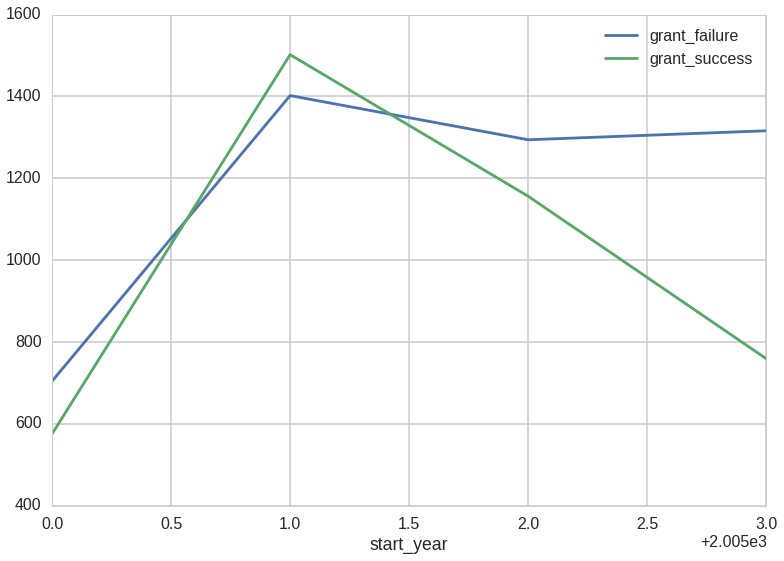

In [37]:
ts.plot();

** Conclusions **
* Success rates have declined gradually from 2007 onwards.
* This means that something after 2007 had changed which affected the acceptance process.
* Since our test set has examples from 2009-2010, which means we would have to think whether to take examples prior to 2007 in consideration or not.

## DataTypes

In [57]:
grants_train.dtypes

Grant.Application.ID                                int64
Grant.Status                                        int64
Sponsor.Code                                       object
Grant.Category.Code                                object
Contract.Value.Band...see.note.A                   object
Start.date                                 datetime64[ns]
RFCD.Code.1                                       float64
RFCD.Percentage.1                                 float64
RFCD.Code.2                                       float64
RFCD.Percentage.2                                 float64
RFCD.Code.3                                       float64
RFCD.Percentage.3                                 float64
RFCD.Code.4                                       float64
RFCD.Percentage.4                                 float64
RFCD.Code.5                                       float64
RFCD.Percentage.5                                 float64
SEO.Code.1                                        float64
SEO.Percentage

In [74]:
grants_train_not_null = grants_train

In [77]:
from sklearn.feature_extraction import DictVectorizer

train = grants_train_not_null[grants_train.columns.drop('Start.date')].T.to_dict().values()

vec = DictVectorizer()
train = vec.fit_transform(train)

array([[  4.00000000e+00,              nan,              nan, ...,
                     nan,              nan,   2.00500000e+03],
       [  6.00000000e+00,              nan,              nan, ...,
                     nan,              nan,   2.00500000e+03],
       [  0.00000000e+00,              nan,              nan, ...,
                     nan,              nan,   2.00500000e+03],
       ..., 
       [  0.00000000e+00,              nan,              nan, ...,
                     nan,              nan,   2.00500000e+03],
       [  8.00000000e+00,              nan,              nan, ...,
                     nan,              nan,   2.00500000e+03],
       [  1.00000000e+00,              nan,              nan, ...,
                     nan,              nan,   2.00500000e+03]])